In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [2]:
! pip install kaggle
! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/


! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle datasets download -d ammarnassanalhajali/pklot-dataset

 99% 831M/843M [00:04<00:00, 170MB/s]
100% 843M/843M [00:04<00:00, 210MB/s]


In [4]:
!unzip pklot-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/2013-02-26_18_39_39_jpg.rf.621541916a316aeb8a9b81073df83559.jpg  
  inflating: train/2013-02-26_18_44_40_jpg.rf.8293019148cb7baa53027c24d38e27d9.jpg  
  inflating: train/2013-02-26_18_49_40_jpg.rf.c1eef7b65c0ed923ae06dbb061f196ec.jpg  
  inflating: train/2013-02-28_17_55_44_jpg.rf.ad44deba4e9cde52deb94231ad08fcdb.jpg  
  inflating: train/2013-02-28_18_10_44_jpg.rf.936d3fd30bd7da00d27994511c6a5fac.jpg  
  inflating: train/2013-02-28_18_20_45_jpg.rf.13435b67a7e0e57486133b88971ccc0a.jpg  
  inflating: train/2013-02-28_18_35_45_jpg.rf.2e805c0b4ea593bd4e96cd963b7c16b2.jpg  
  inflating: train/2013-02-28_18_40_45_jpg.rf.82aac71416c286b8b24b22f2c450f9b4.jpg  
  inflating: train/2013-03-01_17_43_00_jpg.rf.5156dec72ce62742222ed5190f646021.jpg  
  inflating: train/2013-03-01_17_53_00_jpg.rf.8f10861ebe9ce688376a83583786e9a3.jpg  
  inflating: train/2013-03-01_18_03_01_jpg.rf.0f590f1dd5b0d144f592ae9eec4b1d42.jpg  
  inflating: t

In [5]:
!kaggle datasets download -d daggysheep/find-a-car-park

100% 5.00G/5.00G [00:36<00:00, 212MB/s]
100% 5.00G/5.00G [00:36<00:00, 146MB/s]


In [6]:
!unzip find-a-car-park.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/Full/img_729143007.jpg  
  inflating: data/Full/img_729160007.jpg  
  inflating: data/Full/img_729163006.jpg  
  inflating: data/Full/img_730080006.jpg  
  inflating: data/Full/img_730083006.jpg  
  inflating: data/Full/img_731170006.jpg  
  inflating: data/Full/img_731230006.jpg  
  inflating: data/Full/img_801010006.jpg  
  inflating: data/Full/img_801063006.jpg  
  inflating: data/Full/img_802063006.jpg  
  inflating: data/Full/img_802070006.jpg  
  inflating: data/Full/img_802073006.jpg  
  inflating: data/Full/img_802080006.jpg  
  inflating: data/Full/img_803043006.jpg  
  inflating: data/Full/img_803173006.jpg  
  inflating: data/Full/img_808171558.jpg  
  inflating: data/Full/img_808172159.jpg  
  inflating: data/Full/img_809023602.jpg  
  inflating: data/Full/img_809024602.jpg  
  inflating: data/Full/img_809025102.jpg  
  inflating: data/Full/img_809040602.jpg  
  inflating: data/Full/img_809042103.jpg  
  i

In [9]:
import numpy as np
import pandas as pd
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [8]:
data_path = "/content/data"
Categories = ["Free", "Full"]
img_size = 224

In [9]:
data = []
def create_data():
    for category in Categories:
        path = os.path.join(data_path,category)
        class_num = Categories.index(category)
        print(path)
        for img in os.listdir(path):
            # print(img)
            img_arr = cv2.imread(os.path.join(path,img))
            new_img_arr = cv2.resize(img_arr,(img_size,img_size))
            data.append([new_img_arr,class_num])
create_data()

/content/data/Free
/content/data/Full


In [10]:
len(data)
X= []
Y= []

In [11]:
for features, labels in data:
    X.append(features)
    Y.append(labels)

In [12]:
X[0]

array([[[139, 113, 139],
        [137, 114, 136],
        [135, 111, 133],
        ...,
        [148, 118, 143],
        [151, 121, 146],
        [149, 118, 143]],

       [[145, 120, 148],
        [130, 106, 129],
        [134, 110, 134],
        ...,
        [152, 122, 147],
        [150, 121, 147],
        [148, 119, 145]],

       [[135, 110, 138],
        [138, 115, 138],
        [131, 105, 128],
        ...,
        [147, 117, 142],
        [153, 124, 147],
        [151, 121, 146]],

       ...,

       [[139, 116, 130],
        [141, 116, 130],
        [140, 115, 129],
        ...,
        [171, 158, 175],
        [155, 139, 152],
        [145, 126, 139]],

       [[138, 116, 128],
        [139, 116, 130],
        [140, 117, 132],
        ...,
        [179, 168, 186],
        [159, 142, 153],
        [143, 125, 138]],

       [[138, 116, 128],
        [138, 116, 128],
        [142, 119, 133],
        ...,
        [168, 157, 173],
        [155, 139, 151],
        [141, 124, 134]]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [14]:
def process_images(image):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (224,224))
    return image

In [15]:
x_train = process_images(x_train)
x_test = process_images(x_test)

In [16]:
x_train = np.array(x_train).reshape(-1, 224,224, 3)
y_train = np.array(y_train)
x_test = np.array(x_test).reshape(-1, 224,224, 3)
y_test = np.array(y_test)

In [17]:
x_validate = x_train[:520]
x_train = x_train[521:]
y_validate = y_train[:520]
y_train = y_train[521:]

In [18]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', input_shape=(224,224,3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu', input_shape=(224,224,3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax', input_shape=(224,224,3))
])

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 54, 54, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 26, 26, 256)       1024      
 chNormalization)                                                
                                                        

In [20]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",mode ="min", patience = 5,restore_best_weights = True)

In [21]:
history = model.fit(x_train,y_train, epochs=20, validation_data = (x_validate,y_validate),callbacks =[earlystopping])

Epoch 1/20
66/66 [==============================] - 17s 75ms/step - loss: 1.0820 - accuracy: 0.7059 - val_loss: 1.8476 - val_accuracy: 0.7962
Epoch 2/20
66/66 [==============================] - 2s 34ms/step - loss: 0.5229 - accuracy: 0.8343 - val_loss: 1.1769 - val_accuracy: 0.8423
Epoch 3/20
66/66 [==============================] - 2s 34ms/step - loss: 0.3866 - accuracy: 0.8558 - val_loss: 0.4555 - val_accuracy: 0.8865
Epoch 4/20
66/66 [==============================] - 2s 33ms/step - loss: 0.2622 - accuracy: 0.9104 - val_loss: 0.2171 - val_accuracy: 0.9154
Epoch 5/20
66/66 [==============================] - 2s 33ms/step - loss: 0.1654 - accuracy: 0.9363 - val_loss: 0.1151 - val_accuracy: 0.9635
Epoch 6/20
66/66 [==============================] - 2s 37ms/step - loss: 0.1338 - accuracy: 0.9502 - val_loss: 0.0865 - val_accuracy: 0.9558
Epoch 7/20
66/66 [==============================] - 3s 42ms/step - loss: 0.0996 - accuracy: 0.9612 - val_loss: 0.0705 - val_accuracy: 0.9731
Epoch 8/20
6

In [22]:
model.evaluate(x_test, y_test)

21/21 [==============================] - 0s 21ms/step - loss: 0.0563 - accuracy: 0.9786


[0.0563492476940155, 0.9785605072975159]

In [23]:
pred = model.predict(x_test)
pred_digits = np.argmax(pred, axis = 1)

21/21 [==============================] - 1s 14ms/step


In [24]:
i = 0
prop_class = []
mis_class = []

for i in range(len(y_test)):
    if(y_test[i] == pred_digits[i]):
        prop_class.append(i)
    else:
        mis_class.append(i)

print("Properly Predicted: "+str(len(prop_class)))
print("Misclassified: "+str(len(mis_class)))

Properly Predicted: 639
Misclassified: 14


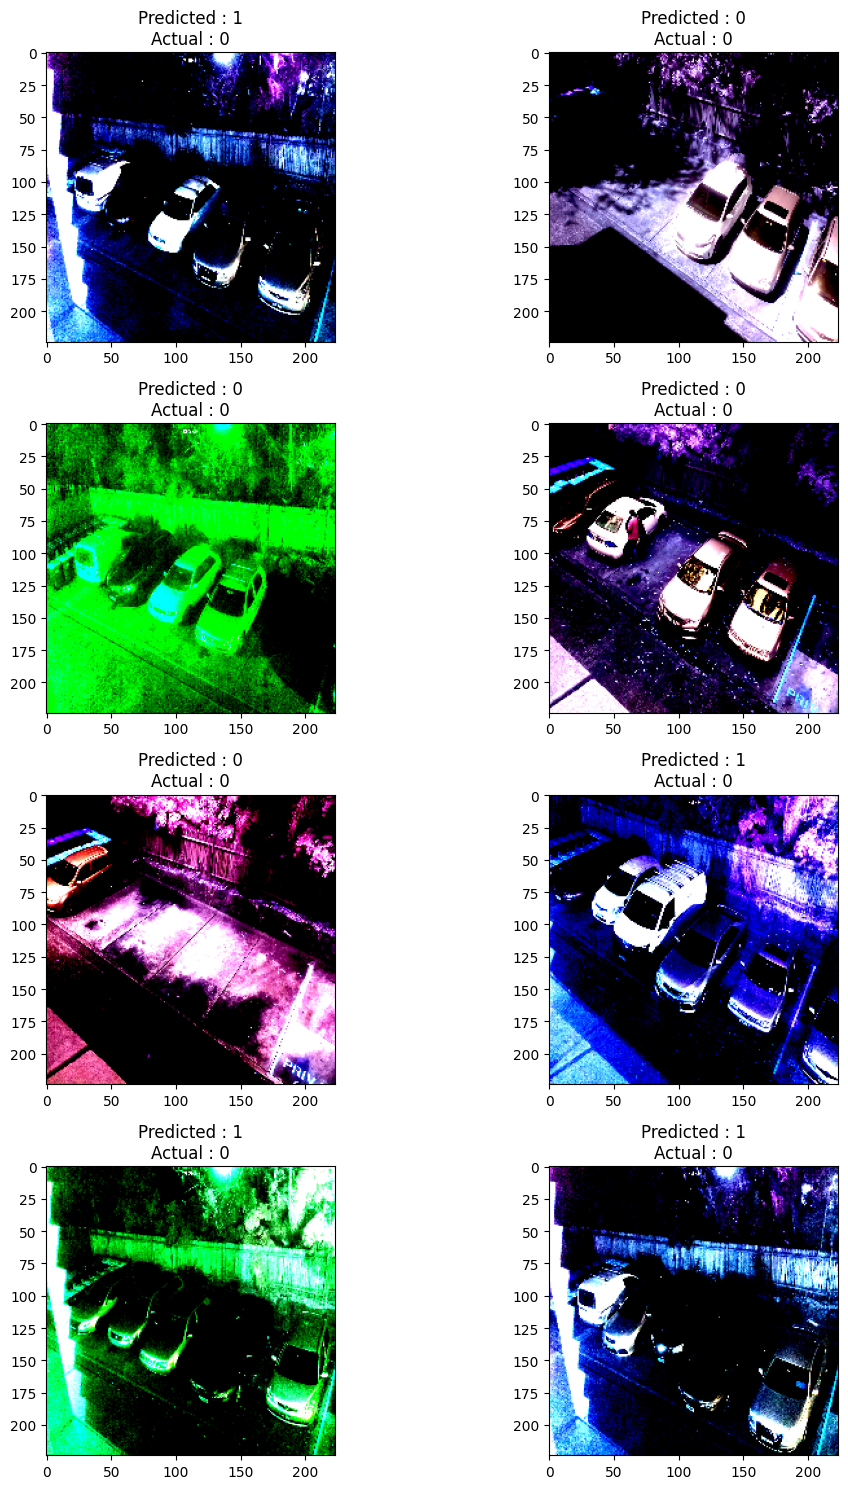

In [25]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted : "+str(pred_digits[prop_class[count]])+"\n"+"Actual : "+str(np.argmax([y_test[prop_class[count]]])))
        plt.tight_layout()
        count+=1

In [30]:
data_path = "/content/"
Categories = ["test","valid"]
img_size = 150

In [31]:
data = []

def create_data():
    for category in Categories:
        path = os.path.join(data_path, category)
        class_num = Categories.index(category)
        print(path)
        for img in os.listdir(path):
            print(img)
            img_path = os.path.join(path, img)
            img_arr = cv2.imread(img_path)

            # Check if the image is valid and not empty before resizing
            if img_arr is not None and not img_arr.size == 0:
                new_img_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([new_img_arr, class_num])
            else:
                print(f"Skipping {img_path} as it's not a valid image.")

create_data()


/content/test
2012-09-12_09_18_46_jpg.rf.d95bc1a314fb384813111f94c25b4ef3.jpg
2012-12-23_08_35_03_jpg.rf.869f498da5a64389501acf6bf23a6a17.jpg
2013-03-15_11_30_06_jpg.rf.8689c1499b9e064bc5be8dc843bb37ee.jpg
2012-10-31_13_58_19_jpg.rf.9b9450c16887ee47c864d691f8ac2d90.jpg
2013-01-19_19_50_16_jpg.rf.a5dc99d9c1dc2a49c2fbce09731c7c87.jpg
2013-01-18_11_25_07_jpg.rf.049521f780f1cc09897ae10280e8ac02.jpg
2013-03-16_12_35_07_jpg.rf.bc923b84bcf9f810f136fd448c4004e7.jpg
2012-10-13_16_54_01_jpg.rf.447fa1971bec543e562b43d75643b867.jpg
2013-04-15_15_40_10_jpg.rf.d72fe528f0ef2bd7d77df37119a06632.jpg
2012-12-18_11_35_07_jpg.rf.1e3e6269ce14081b14ea3604d03bfefd.jpg
2013-01-16_10_00_05_jpg.rf.b64d0d5841c90bd74fdb1add3484745a.jpg
2012-12-28_16_10_12_jpg.rf.4bb85f073e9f3188f4ef4ec6261f7185.jpg
2013-04-09_11_00_05_jpg.rf.adef326ba2b9bede4c6c639d68059219.jpg
2013-04-14_14_25_09_jpg.rf.ef7b9a917fe372d76d1cab6c7ea783fa.jpg
2012-12-16_15_30_12_jpg.rf.4e90e6a989171b28381b61185d3c8d79.jpg
2013-01-18_12_15_08_jpg.rf

In [33]:
test_data_path = "/content/test"  # Update this to the correct path
img_size = 227  # Set your desired image size

owu_img_data = []
owu_img_np = []

for owu_test_img in os.listdir(test_data_path):
    img_path = os.path.join(test_data_path, owu_test_img)

    # Try to load the image
    test_img_arr = cv2.imread(img_path)

    # Check if the image is valid and not empty before processing
    if test_img_arr is not None and not test_img_arr.size == 0:
        test_new_img_arr = cv2.resize(test_img_arr, (img_size, img_size))
        test_img = process_images(test_new_img_arr)
        test_img = tf.image.per_image_standardization(test_img)
        test_img = np.array(test_img).reshape(-1, 224, 224, 3)
        owu_img_data.append(img_path)
        owu_img_np.append(test_img)
    else:
        print(f"Skipping {img_path} as it's not a valid image.")

# Now, you can proceed with the processed images in owu_img_np.


Skipping /content/test/_annotations.coco.json as it's not a valid image.


In [34]:
owu_predictions=[]
for test_img in owu_img_np:
        owu_pred=model.predict(test_img)
        owu_pred_digits=np.argmax(owu_pred,axis=1)
        owu_predictions.append(float(owu_pred_digits))

1/1 [==============================] - 0s 26ms/step


In [35]:
owu_results = []
for pred in owu_predictions:
    if(pred == 0):
        owu_results.append("free")
    else:
        owu_results.append("full")

ValueError: ignored

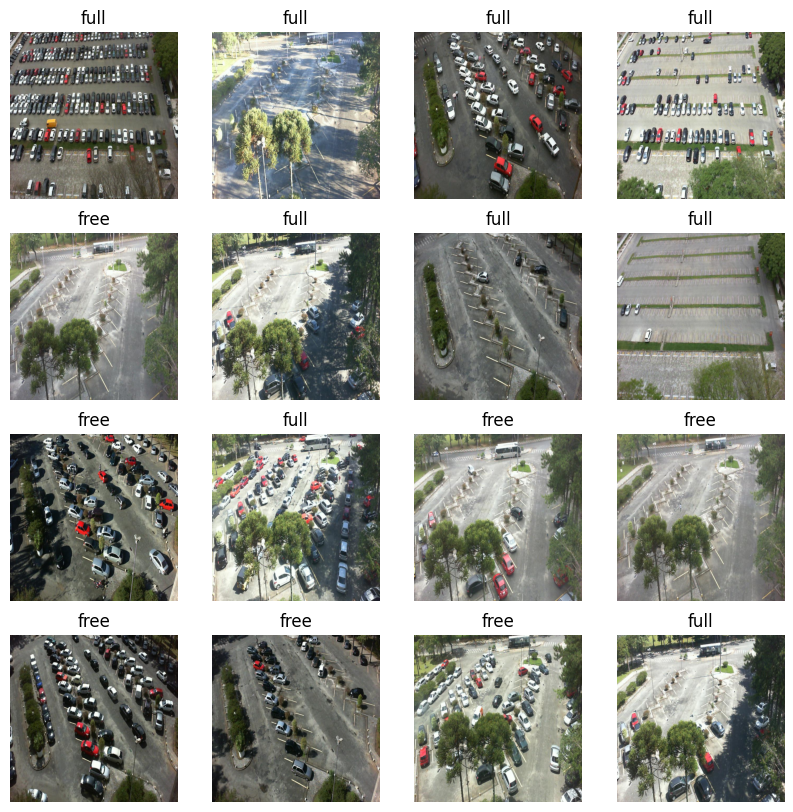

In [40]:
fig = plt.figure(figsize=(10, 10))
k = 0


for test_img in owu_img_data[:]:
    k = k + 1
    ax = fig.add_subplot(4, 4, k)
    img = mpimg.imread(test_img)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(owu_results[owu_img_data.index(test_img)])

plt.tight_layout()
plt.show()

In [1]:
# File path to the dataset directory
Full= "/content/data/Full"
Free="/content/data/Free"

In [2]:
from tqdm import tqdm
# Ignore the warnings
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [3]:
# Create empty lists for images (X) and labels (Z)
X=[]
Z=[]

In [4]:
# display the length of x
len(X)

0

In [5]:
# Function to assign labels to images based on shot type
def assign_label(img, short_type):
    return short_type

In [6]:
# Process images of a cricket shot type and prepare data for training
def add_shorts_to_train_data(short_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img,short_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150,150))
        X.append(np.array(img))
        Z.append(str(label))

In [10]:
# Add pullshots to the training data
add_shorts_to_train_data("Full",Full)
len(X)

100%|██████████| 2195/2195 [01:20<00:00, 27.29it/s]


2195

In [11]:
# Add sweep shots to the training data
add_shorts_to_train_data("Free",Free)
len(X)

100%|██████████| 1067/1067 [00:39<00:00, 26.91it/s]


3262

In [12]:
# Label Encoding for the dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Z)

In [13]:
 # Categorical Data
from keras.utils import to_categorical
Y=to_categorical(Y,4)

In [14]:
# Convert variable X to a NumPy array
X=np.array(X)

In [15]:
# display the shape of y
Y.shape

(3262, 4)

In [16]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2283, 150, 150, 3), (979, 150, 150, 3), (2283, 4), (979, 4))

In [17]:
import math
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [18]:
 # Defining the parameters
num_classes = 4
batch_size = 32
epochs = 10

In [19]:
# Builds a new model by adding GlobalAveragePooling and a Dense output layer
def build_model(bottom_model, classes):
    model = bottom_model.layers[-2].output
    model = GlobalAveragePooling2D()(model)
    model = Dense(classes, activation = 'softmax', name = 'out_layer')(model)

    return model

In [20]:
"""# VGG19"""
vgg = tf.keras.applications.VGG19(weights = 'imagenet',
                                      include_top = False,
                                      input_shape = (150, 150, 3))

head = build_model(vgg, num_classes)
model = Model(inputs = vgg.input, outputs = head)
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)
lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)

optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = epochs,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_vgg = np.argmax(model.predict(x_test), axis=1)



Epoch 1/10
71/71 [==============================] - 49s 425ms/step - loss: 0.6882 - accuracy: 0.6908 - val_loss: 0.4656 - val_accuracy: 0.7926 - lr: 1.0000e-04
Epoch 2/10
71/71 [==============================] - 33s 453ms/step - loss: 0.4893 - accuracy: 0.7884 - val_loss: 0.4172 - val_accuracy: 0.8018 - lr: 1.0000e-04
Epoch 3/10
71/71 [==============================] - 31s 436ms/step - loss: 0.4441 - accuracy: 0.8169 - val_loss: 0.3262 - val_accuracy: 0.8744 - lr: 1.0000e-04
Epoch 4/10
71/71 [==============================] - 34s 470ms/step - loss: 0.3128 - accuracy: 0.8866 - val_loss: 0.2020 - val_accuracy: 0.9346 - lr: 1.0000e-04
Epoch 5/10
71/71 [==============================] - 36s 507ms/step - loss: 0.2117 - accuracy: 0.9269 - val_loss: 0.1128 - val_accuracy: 0.9663 - lr: 1.0000e-04
Epoch 6/10
71/71 [==============================] - 36s 501ms/step - loss: 0.1270 - accuracy: 0.9588 - val_loss: 0.0624 - val_accuracy: 0.9898 - lr: 1.0000e-04
Epoch 7/10
71/71 [======================

In [21]:
"""# ResNet"""
res = tf.keras.applications.ResNet50(weights = 'imagenet',
                                      include_top = False,
                                      input_shape = (150, 150, 3))

head = build_model(res, num_classes)

model = Model(inputs = res.input, outputs = head)

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]
train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)

optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = epochs,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_res = np.argmax(model.predict(x_test), axis=1)


Epoch 1/10
71/71 [==============================] - 70s 452ms/step - loss: 0.3671 - accuracy: 0.8901 - val_loss: 0.2043 - val_accuracy: 0.9683 - lr: 1.0000e-04
Epoch 2/10
71/71 [==============================] - 36s 505ms/step - loss: 0.1304 - accuracy: 0.9658 - val_loss: 0.0888 - val_accuracy: 0.9888 - lr: 1.0000e-04
Epoch 3/10
71/71 [==============================] - 37s 504ms/step - loss: 0.0971 - accuracy: 0.9746 - val_loss: 0.1790 - val_accuracy: 0.9663 - lr: 1.0000e-04
Epoch 4/10
71/71 [==============================] - 36s 493ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.0657 - val_accuracy: 0.9918 - lr: 1.0000e-04
Epoch 5/10
71/71 [==============================] - 34s 466ms/step - loss: 0.0523 - accuracy: 0.9829 - val_loss: 0.0980 - val_accuracy: 0.9806 - lr: 1.0000e-04
Epoch 6/10
71/71 [==============================] - 35s 492ms/step - loss: 0.0274 - accuracy: 0.9943 - val_loss: 0.0486 - val_accuracy: 0.9939 - lr: 1.0000e-04
Epoch 7/10
71/71 [======================

In [22]:
"""# MobileNet"""

res = tf.keras.applications.MobileNet(weights = 'imagenet',
                                      include_top = False,
                                      input_shape = (150, 150, 3))

head = build_model(res, num_classes)
model = Model(inputs = res.input, outputs = head)

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler]

train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)
optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = epochs,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_mob = np.argmax(model.predict(x_test), axis=1)

17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/10
71/71 [==============================] - 45s 413ms/step - loss: 2.4014 - accuracy: 0.7880 - val_loss: 1.1079 - val_accuracy: 0.8264 - lr: 1.0000e-04
Epoch 2/10
71/71 [==============================] - 33s 454ms/step - loss: 0.3271 - accuracy: 0.9527 - val_loss: 1.1283 - val_accuracy: 0.8754 - lr: 1.0000e-04
Epoch 3/10
71/71 [==============================] - 33s 458ms/step - loss: 0.1950 - accuracy: 0.9685 - val_loss: 0.1552 - val_accuracy: 0.9663 - lr: 1.0000e-04
Epoch 4/10
71/71 [==============================] - 33s 455ms/step - loss: 0.2016 - accuracy: 0.9606 - val_loss: 1.2395 - val_accuracy: 0.8744 - lr: 1.0000e-04
Epoch 5/10
71/71 [==============================] - 35s 477ms/step - loss: 0.1863 - accuracy: 0.9615 - val_loss: 0.2242 - val_accuracy: 0.9724 - lr: 1.0000e-04
Epoch 6/10
71/71 [==============================] - 29s 400ms/step - loss: 0.1667 - accuracy: 0.9724 - val_loss: 0.5932 - val_accuracy:

In [23]:
!pip install efficientnet
from efficientnet.tfkeras import EfficientNetB0  # You can choose a different variant (B0, B1, ..., B7) based on your requirements
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [24]:
#Effiencientnet
res = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
head = build_model(res, num_classes)

model = Model(inputs = res.input, outputs = head)

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)

optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = epochs,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_eff = np.argmax(model.predict(x_test), axis=1)


16804768/16804768 [==============================] - 0s 0us/step
Epoch 1/10
71/71 [==============================] - 95s 478ms/step - loss: 0.4893 - accuracy: 0.8086 - val_loss: 0.2756 - val_accuracy: 0.8979 - lr: 1.0000e-04
Epoch 2/10
71/71 [==============================] - 37s 518ms/step - loss: 0.1395 - accuracy: 0.9457 - val_loss: 0.1117 - val_accuracy: 0.9591 - lr: 1.0000e-04
Epoch 3/10
71/71 [==============================] - 35s 477ms/step - loss: 0.1055 - accuracy: 0.9601 - val_loss: 0.1262 - val_accuracy: 0.9530 - lr: 1.0000e-04
Epoch 4/10
71/71 [==============================] - 36s 493ms/step - loss: 0.0733 - accuracy: 0.9759 - val_loss: 0.0694 - val_accuracy: 0.9816 - lr: 1.0000e-04
Epoch 5/10
71/71 [==============================] - 38s 519ms/step - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0596 - val_accuracy: 0.9857 - lr: 1.0000e-04
Epoch 6/10
71/71 [==============================] - 34s 467ms/step - loss: 0.0442 - accuracy: 0.9834 - val_loss: 0.0580 - val_accuracy:

In [25]:
"""# DenseNet"""
import tensorflow as tf
res = tf.keras.applications.DenseNet121(weights = 'imagenet',
                                      include_top = False,
                                      input_shape = (150, 150, 3))
head = build_model(res, num_classes)

den_model = Model(inputs = res.input, outputs = head)

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                                   min_delta = 0.00005,
                                   patience = 11,
                                   verbose = 1,
                                   restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                     factor = 0.5,
                                     patience = 7,
                                     min_lr = 1e-7,
                                     verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

train_datagen = ImageDataGenerator(rotation_range = 15,
                                       width_shift_range = 0.15,
                                       height_shift_range = 0.15,
                                       shear_range = 0.15,
                                       zoom_range = 0.15,
                                       horizontal_flip = True,)
train_datagen.fit(x_train)

optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

den_model.compile(loss = 'categorical_crossentropy',
                  optimizer = optims[0],
                  metrics = ['accuracy'])

history = den_model.fit(train_datagen.flow(x_train,
                                           y_train,
                                           batch_size = batch_size),
                                           validation_data = (x_test, y_test),
                                           steps_per_epoch = len(x_train) / batch_size,
                                           epochs = epochs,
                                           callbacks = callbacks,
                                           use_multiprocessing = True)

yhat_valid_den = np.argmax(den_model.predict(x_test), axis=1)

29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/10
71/71 [==============================] - 123s 536ms/step - loss: 0.6609 - accuracy: 0.7779 - val_loss: 0.5756 - val_accuracy: 0.8345 - lr: 1.0000e-04
Epoch 2/10
71/71 [==============================] - 37s 506ms/step - loss: 0.1335 - accuracy: 0.9676 - val_loss: 0.1164 - val_accuracy: 0.9847 - lr: 1.0000e-04
Epoch 3/10
71/71 [==============================] - 40s 533ms/step - loss: 0.0741 - accuracy: 0.9781 - val_loss: 0.0730 - val_accuracy: 0.9877 - lr: 1.0000e-04
Epoch 4/10
71/71 [==============================] - 39s 529ms/step - loss: 0.0407 - accuracy: 0.9912 - val_loss: 0.0501 - val_accuracy: 0.9928 - lr: 1.0000e-04
Epoch 5/10
71/71 [==============================] - 37s 507ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0632 - val_accuracy: 0.9888 - lr: 1.0000e-04
Epoch 6/10
71/71 [==============================] - 39s 536ms/step - loss: 0.0255 - accuracy: 0.9926 - val_loss: 0.0237 - val_accuracy

In [26]:
# Calculates and organizes evaluation metrics for different models

y_true = np.argmax(y_test, axis=1)
accuracy_vgg = accuracy_score(y_true, yhat_valid_vgg)
precision_vgg = precision_score(y_true, yhat_valid_vgg, average='weighted')
recall_vgg = recall_score(y_true, yhat_valid_vgg, average='weighted')
f1_vgg = f1_score(y_true, yhat_valid_vgg, average='weighted')

accuracy_res = accuracy_score(y_true, yhat_valid_res)
precision_res = precision_score(y_true, yhat_valid_res, average='weighted')
recall_res = recall_score(y_true, yhat_valid_res, average='weighted')
f1_res = f1_score(y_true, yhat_valid_res, average='weighted')

accuracy_mob = accuracy_score(y_true, yhat_valid_mob)
precision_mob = precision_score(y_true, yhat_valid_mob, average='weighted')
recall_mob = recall_score(y_true, yhat_valid_mob, average='weighted')
f1_mob = f1_score(y_true, yhat_valid_mob, average='weighted')

accuracy_eff = accuracy_score(y_true, yhat_valid_eff)
precision_eff = precision_score(y_true, yhat_valid_eff, average='weighted')
recall_eff = recall_score(y_true, yhat_valid_eff, average='weighted')
f1_eff = f1_score(y_true, yhat_valid_eff, average='weighted')

accuracy_den = accuracy_score(y_true, yhat_valid_den)
precision_den = precision_score(y_true, yhat_valid_den, average='weighted')
recall_den = recall_score(y_true, yhat_valid_den, average='weighted')
f1_den = f1_score(y_true, yhat_valid_den, average='weighted')


data = {
    'Model': ['VGGNet', 'ResNet', 'MobileNet', 'EfficientNet', 'DenseNet'],
    'Accuracy': [accuracy_vgg, accuracy_res, accuracy_mob, accuracy_eff, accuracy_den],
    'Precision': [precision_vgg, precision_res, precision_mob, precision_eff, precision_den],
    'Recall': [recall_vgg, recall_res, recall_mob, recall_eff, recall_den],
    'F1 Score': [f1_vgg, f1_res, f1_mob, f1_eff, f1_den]
    }

    # Create a DataFrame
df = pd.DataFrame(data)

    # Set 'Model' as the index
df.set_index('Model', inplace=True)

df = df.sort_values(by='Accuracy', ascending=False)

In [27]:
df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
ResNet,0.991828,0.991840,0.991828,0.991815
VGGNet,0.990807,0.990802,0.990807,0.990803
DenseNet,0.987743,0.988949,0.987743,0.988183
MobileNet,0.985700,0.985897,0.985700,0.985628
EfficientNet,0.982635,0.982624,0.982635,0.982628
